# 3ª aula: Computação Quântica e Qiskit

## Bibliography

- *Introduction to Computational Quantum Mechanics*, Roman Schmied. 
  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050)
- Benenti G., Casati G., Strini G. Principles of Quantum Computation and Information Vol. 1.. Basic Concepts (WS, 2004)(ISBN 9812388583)(267s)
- Quantum Computation and Quantum Information, Michael A. Nielsen & Isaac L. Chuang, University Press, Cambridge
- A Practical Introduction to Quantum Computing: From Qubits to Quantum Machine Learning and Beyond, Elías F. Combarro
- wikipedia
- [https://qiskit.org/documentation/](https://qiskit.org/documentation/)

## Qiskit

Qiskit is an open-source software development kit (SDK) for working with quantum computers at the level of circuits, pulses, and algorithms. It provides tools for creating and manipulating quantum programs and running them on prototype quantum devices on IBM Quantum Experience or on simulators on a local computer. It follows the circuit model for universal quantum computation, and can be used for any quantum hardware (currently supports superconducting qubits and trapped ions) that follows this model.

## Install Qiskit

[https://qiskit.org/documentation/getting_started.html](https://qiskit.org/documentation/getting_started.html)

## Introduction to Qiskit
[https://qiskit.org/documentation/intro_tutorial1.html](https://qiskit.org/documentation/intro_tutorial1.html)

[https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html](https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html)

## IBM Quantum Experience

+ Free online access to quantum simulators (up to 32 qubits) and actual quantum computers (1, 5 and 15 qubits) with different topologies
* Programmable with a visual interface and via different languages (python, qasm, Jupyter Notebooks)
* Launched in May 2016

__Create an account__

* [https://quantum-computing.ibm.com/](https://quantum-computing.ibm.com/)
    * New User Registration
    * Your IBMid is activated.
    * Sign into My IBM to manage your IBMid.
* [https://www.ibm.com/quantum-computing/tools/](https://www.ibm.com/quantum-computing/tools/)
* [https://quantum-computing.ibm.com/lab/docs/iql/first-circuit](https://quantum-computing.ibm.com/lab/docs/iql/first-circuit)
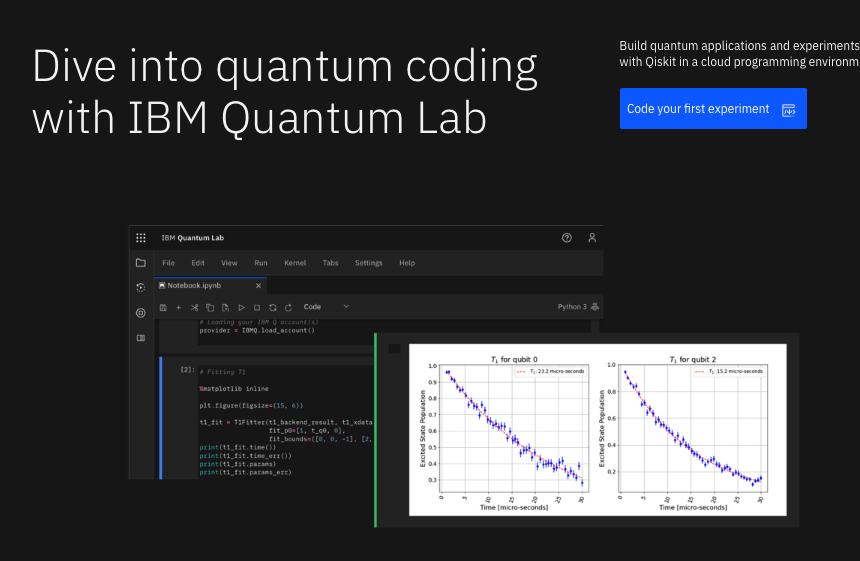 <!-- 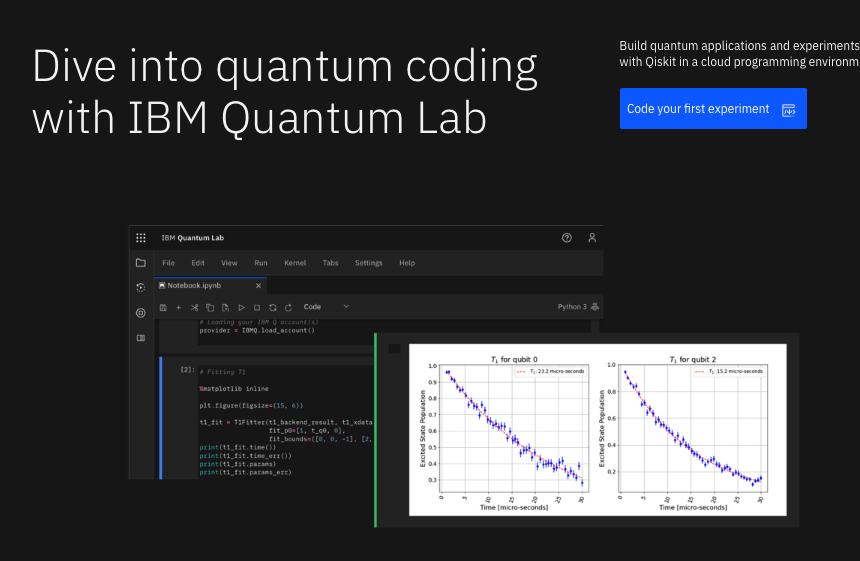 -->


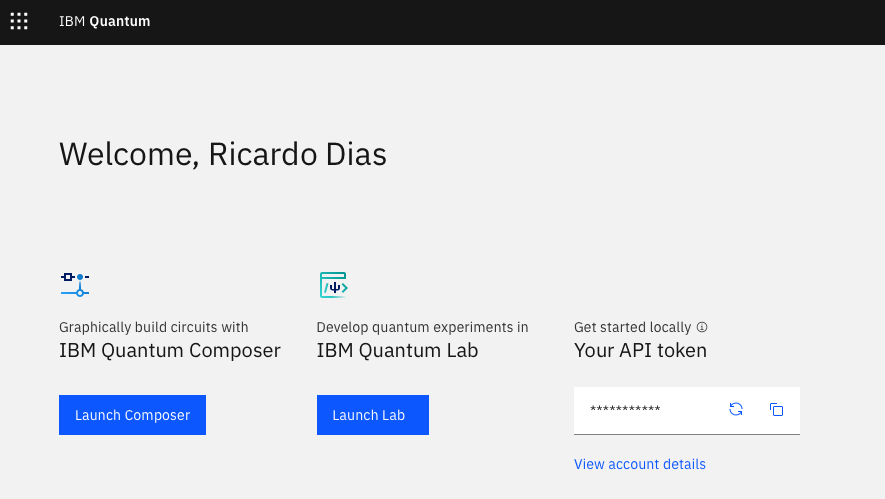 <!-- 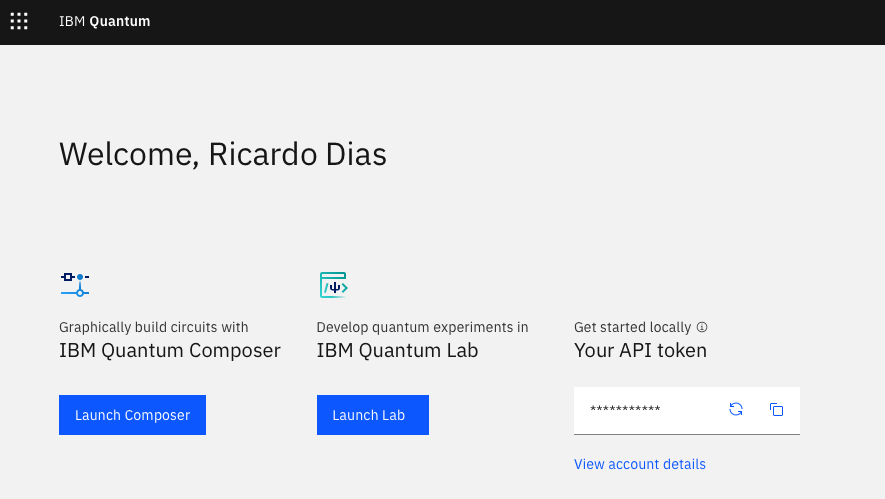 -->



## First code in IBM Quantum Lab

[https://quantum-computing.ibm.com/lab/docs/iql/first-circuit#code-your-first-quantum-circuit](https://quantum-computing.ibm.com/lab/docs/iql/first-circuit#code-your-first-quantum-circuit)

[https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/qiskit/circuits/1_getting_started_with_qiskit.ipynb](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/qiskit/circuits/1_getting_started_with_qiskit.ipynb)


__Exercise:__

* Explain what the following algorithm does.
* Sugest a circuit in such a way that the result is "Counts for the basis states: {'000': 250 '101': 250}

In [5]:
import numpy as np #imports the numpy package which as various tools that help
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import execute
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity

# Create a quantum circuit for 3 qubits
qc = QuantumCircuit(3) #create a circuit for 3 qubits (3 paths)
# Add gates
qc.cnot(0,1) #applies the CNOT with 0 (first path) being the control and 1 (second path) being the target
qc.rz(np.pi/8, 2) #applies the matrix of rotation around the z axis with a angle of pi/8 to the third path
# Add a measurement to all qubits
qc.measure_all()

# Simulate the experiment
qasm_simulator = Aer.get_backend('qasm_simulator') #creates the backend of the simulator
job = execute(qc, qasm_simulator, shots=500) #runs the circuit qc in the simulator and shots 500
result = job.result() #results
counts = result.get_counts() #count the result after everything
print("Counts for the basis states:",counts) 
qc.draw()

Counts for the basis states: {'000': 500}


░ ┌─┐      
   q_0: ─────■──────░─┤M├──────
           ┌─┴─┐    ░ └╥┘┌─┐   
   q_1: ───┤ X ├────░──╫─┤M├───
        ┌──┴───┴──┐ ░  ║ └╥┘┌─┐
   q_2: ┤ Rz(π/8) ├─░──╫──╫─┤M├
        └─────────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

## Deutsch-Jozsa algorithm

[https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)

* We have an oracle Of for a boolean function $f(x_1,...,x_n)$ (a circuit that implements a one-bit boolean function)
* We are promised that f is either constant (always 0 or 1) or balanced (0 for half of the inputs and 1 for the rest)
* We have to decide which of the two cases we are in bycalling the function as few times as possible

With a classical deterministic algorithm we need (in the worst case) $2^{n−1} + 1$ calls to f

With the Deutsch-Jozsa quantum algorithm it is enough to evaluate f just once

__2 qubits:__
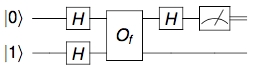

__n qubits:__
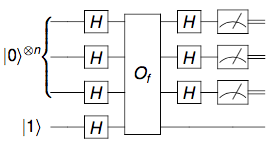

__Steps:__

1. We create the state $|0...0⟩|1⟩$


2. We use Hadamard gates to create the superposition
$$\sum_{x\in \{0,1\}^n} \dfrac{1}{\sqrt{2^{n+1}}}|x⟩(|0⟩-|1⟩)$$


3. We apply the oracle, getting
$$\sum_{x\in \{0,1\}^n} \dfrac{1}{\sqrt{2^{n+1}}}|x⟩(|0\oplus f(x)⟩-|1\oplus f(x)⟩)$$
$$=\sum_{x\in \{0,1\}^n} \dfrac{(-1)^{f(x)}}{\sqrt{2^{n+1}}}|x⟩(|0⟩-|1⟩)$$


4. We apply again Hadamard gates to the n first qubits and we obtain

$$\sum_{y\in \{0,1\}^n}\sum_{x\in \{0,1\}^n} \dfrac{(-1)^{f(x)+x.y}}{2^{n} \sqrt{2}}|y⟩(|0⟩-|1⟩)$$


5. Finally, we measure the n first qubits.


6. If the function is constant, we will obtain |0⟩. Otherwise (if the function is balanced), we will get a string different from |0⟩.

The probability of measuring |0⟩ is exactly

$$\left(\sum_{x\in \{0,1\}^n} \dfrac{(-1)^{f(x)+x.0}}{2^{n}}\right)^2=
\left(\sum_{x\in \{0,1\}^n} \dfrac{(-1)^{f(x)}}{2^{n}}\right)^2
$$

If f is constant, the sum is 1.

If f is balanced, the sum is 0.

## Homework: Deutsch-Jozsa algorithm

[https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)

* download the jupyter notebook
* run locally
* run in the Quantum Lab

## Homework: Quantum Teleportation

[https://qiskit.org/textbook/ch-algorithms/teleportation.html](https://qiskit.org/textbook/ch-algorithms/teleportation.html)

* download the jupyter notebook
* run locally
* run in the Quantum Lab

## Projects:

- Quantum Algorithms
- Jupyter notebook about Logical Qubits and Quantum Error Correction
